# Ford GoBike Data Exploration
## by Naif Alsofyani

## Preliminary Wrangling

> [Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels) (previously know as Ford GoBike) is a regional public bike-sharing system in the San Francisco Bay Area. And it is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established in 2013, and after the acquisition by [Lyft](https://en.wikipedia.org/wiki/Lyft), the system is expected to have 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [8]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [9]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Cleaning

In [10]:
# Making a copy of the original dataset
df_clean = df.copy()

In [11]:
# Changing 'start_time' and 'end_time' from string to datetime datatype
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [12]:
# Changing 'user_type' and 'member_gender' from string to category datatype
df_clean['user_type'] = df_clean.user_type.astype('category')
df_clean['member_gender'] = df_clean.member_gender.astype('category')

In [13]:
# Double checking if data types are fixed
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
dtype: object

In [14]:
# Creating duration in minutes column and slicing each information in 'start_time' to it's own column
df_clean['duration_minute'] = df_clean['duration_sec']/60

df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_hour_of_day'] = df_clean.start_time.dt.strftime('%H')
df_clean['start_day_of_week'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')

df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hour_of_day,start_day_of_week,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,708.683333,2019-02-28,18,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February


In [15]:
# Creating a new column containing user age 
df_clean['member_age'] = 2021 - df_clean['member_birth_year']

### What is the structure of your dataset?

> There are 183412 bike trips in the dataset with 16 features describing the user, the station and the trip duration
>
> * User info: `bike_id`, `user_type`, `member_birth_year`, `member_gender`, `bike_share_for_all_trip` 
> <br><br>
> * Station info: `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`
><br><br>
> * Trip duration info: `duration_sec`, `start_time`, `end_time`

### What is/are the main feature(s) of interest in your dataset?

> The most interesting features are those related to the user alongside the trip duration, as they can be explored to answer a lot of question.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Each trip's start and end dates will help understanding how long a trip usually takes. User type, gender, and age can give insights about who are the main target customer groups.

## Univariate Exploration

#### Investigating user features

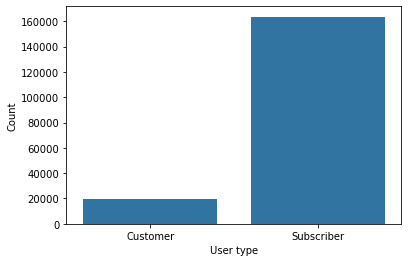

In [16]:
sb.countplot(data=df_clean, x='user_type', color = sb.color_palette()[0]);
plt.xlabel('User type');
plt.ylabel('Count');

> Most users are subscribers

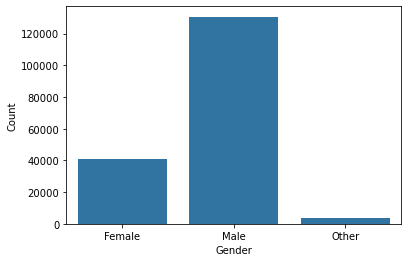

In [17]:
sb.countplot(data=df_clean, x='member_gender', color = sb.color_palette()[0]);
plt.xlabel('Gender');
plt.ylabel('Count');

> Most users are male, more than three times female users count

In [18]:
df_clean.member_age.describe()

count    175147.000000
mean         36.193563
std          10.116689
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: member_age, dtype: float64

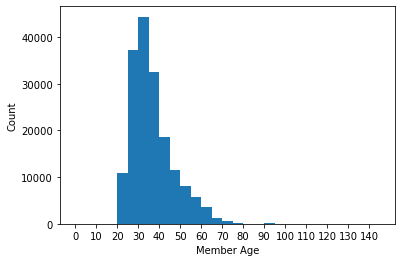

In [19]:
bins = np.arange(0, df_clean['member_age'].max()+5, 5)
ticks = np.arange(0,150,10)
plt.hist(data=df_clean, x='member_age', bins=bins);
plt.xticks(ticks);
plt.xlabel('Member Age');
plt.ylabel('Count');

>Most useres are between the age of 25-40

**We can Conclude from the three histograms above that most users are male subscribers, and most of them are between the age of 25 and 40**

#### Investigating trip features

In [20]:
df_clean.duration_minute.describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_minute, dtype: float64

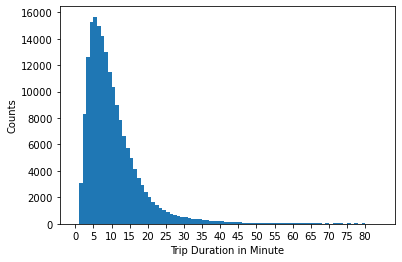

In [21]:
bins = np.arange(0, 85, 1)
ticks = np.arange(0, 85, 5)
plt.hist(data=df_clean, x='duration_minute', bins=bins);
plt.xticks(ticks);
plt.xlabel('Trip Duration in Minute');
plt.ylabel('Counts');

In [22]:
df_clean.query('duration_minute > 80')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hour_of_day,start_day_of_week,start_month,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,February,37.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,708.683333,2019-02-28,18,Thursday,February,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,February,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,February,32.0
91,5621,2019-02-28 21:41:16.900,2019-02-28 23:14:58.186,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,...,Subscriber,1997.0,Female,No,93.683333,2019-02-28,21,Thursday,February,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182133,6086,2019-02-01 07:00:02.042,2019-02-01 08:41:28.251,380.0,Masonic Ave at Turk St,37.779047,-122.447291,377.0,Fell St at Stanyan St,37.771917,...,Subscriber,1971.0,Other,No,101.433333,2019-02-01,07,Friday,February,50.0
182411,13609,2019-02-01 04:38:43.601,2019-02-01 08:25:33.493,106.0,Sanchez St at 17th St,37.763242,-122.430675,79.0,7th St at Brannan St,37.773492,...,Subscriber,1982.0,Male,Yes,226.816667,2019-02-01,04,Friday,February,39.0
183215,17953,2019-02-01 01:39:13.098,2019-02-01 06:38:26.681,86.0,Market St at Dolores St,37.769305,-122.426826,356.0,Valencia St at Clinton Park,37.769188,...,Customer,NaN,NaN,No,299.216667,2019-02-01,01,Friday,February,NaN
183306,13251,2019-02-01 01:03:11.362,2019-02-01 04:44:03.321,31.0,Raymond Kimbell Playground,37.783813,-122.434559,13.0,Commercial St at Montgomery St,37.794231,...,Customer,NaN,NaN,No,220.850000,2019-02-01,01,Friday,February,NaN


> The histogram shows that almost all trips were less than 1 hour, and most of them took between 5 to 10 minutes period.  

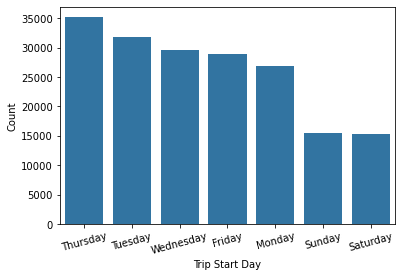

In [23]:
order = df_clean['start_day_of_week'].value_counts().index
sb.countplot(data=df_clean, x='start_day_of_week',order = order, color = sb.color_palette()[0]);
plt.xticks(rotation=15)
plt.xlabel('Trip Start Day');
plt.ylabel('Count');

> Most useres start their trips on workdays.

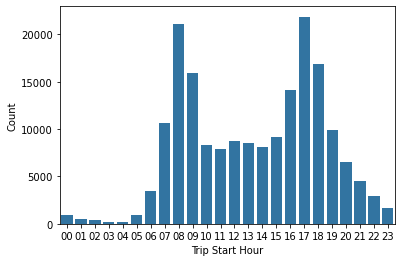

In [24]:
order = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09','10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
         '21', '22', '23']
sb.countplot(data=df_clean, x='start_hour_of_day',order = order,color = sb.color_palette()[0]);
plt.xlabel('Trip Start Hour');
plt.ylabel('Count');

> Most users start their trips at 8 AM and 5 PM

In [25]:
df_clean['start_month'].value_counts()

February    183412
Name: start_month, dtype: int64

**Most Trips are on workdays between 8 AM-9 AM and 5 PM-6 PM, with most trips taking between 5-10 minutes. I would argue that most users are using the bike-sharing system to go and come back from work. In the end, we can't be 100% confident that this is the case we still need more information to assure that.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The number of trips peaked on workdays at the beginning and ending hours of traditional American business
>
> Most Trips lasted between 5 to 10 minutes, though there were some outliers not following the trend.
>
> There are significantly more male users, and most of them are subscribers around the age of 25-40 years


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
>The trip duration distribution was surprising at first. And the dataset contains trips only in February.
>
>I Sliced every information in 'start_time' to have years, months, days, hours all in separate columns to make use of these information more efficiently in the analysis. 

## Bivariate Exploration

In [26]:
# filtering out outlier trips that are very far from the trend
df_clean = df_clean.query('duration_minute <= 60')

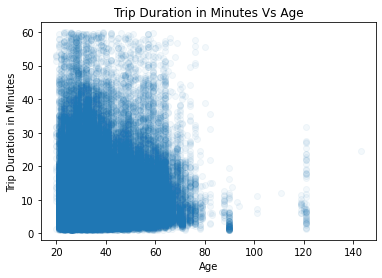

In [27]:
plt.scatter(df_clean['member_age'], df_clean['duration_minute'], alpha = 0.05)
plt.title('Trip Duration in Minutes Vs Age')
plt.xlabel('Age')
plt.ylabel('Trip Duration in Minutes')
plt.show()

>In general, the scatter shows that older people take less trip duration than younger ones.

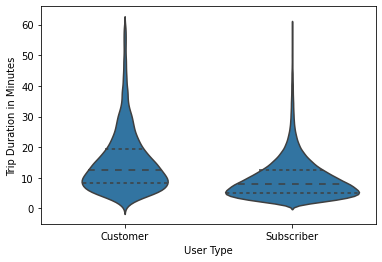

In [28]:
sb.violinplot(data=df_clean, x='user_type', y='duration_minute', color=sb.color_palette()[0], inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minutes');

> Although more than 50% of customers taking longer trips than most subscribers, they don't use it as often as subscribers do.

In [29]:
# filtering out outlier ages that are very far from the trend
df_clean = df_clean.query('member_age <= 80')

In [30]:
df_clean['start_day_of_week'].value_counts()

Thursday     33525
Tuesday      30444
Wednesday    28273
Friday       27466
Monday       25419
Sunday       14228
Saturday     14199
Name: start_day_of_week, dtype: int64

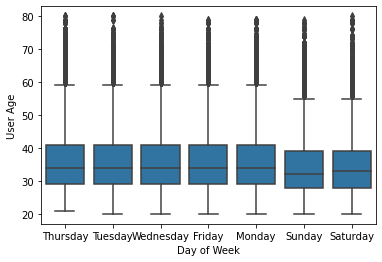

In [31]:
order = df_clean['start_day_of_week'].value_counts().index
sb.boxplot(data=df_clean, x='start_day_of_week', y='member_age',order=order, color=sb.color_palette()[0]);
plt.xlabel('Day of Week');
plt.ylabel('User Age');

>Users who rented the bikes through workdays are slightly older than those who rented on weekends.

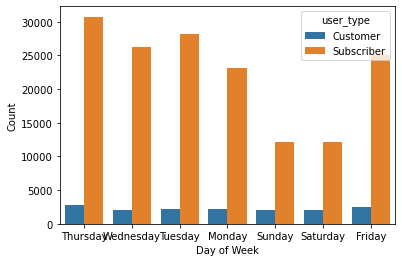

In [32]:
sb.countplot(data=df_clean, x='start_day_of_week', hue='user_type')
plt.xlabel('Day of Week')
plt.ylabel('Count');

>As we already found out before that subscribers are using bikes more often than customers, the interesting observation here is that customers are renting bikes on weekends slightly more than they do on workdays.

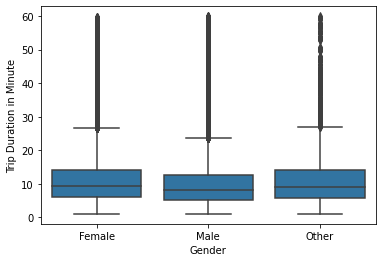

In [33]:
sb.boxplot(data=df_clean, x='member_gender', y='duration_minute', color=sb.color_palette()[0]);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');

>Males tend to have shorter trips compared to females, observed by both a smaller median and shorter IQR. Though, it is not that big of a difference.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In general, younger people tend to use bikes for a longer duration. As for user type, subscribers tend to use the service more than customers do. The riding habit varies between subscribers and customers. Subscribers use the bike-sharing system for work thus, most trips were on workdays and especially during work hours, whereas customers tend to ride on weekends and take longer rides overall.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is interesting to see that subscribers are taking much shorter rides on average.

## Multivariate Exploration


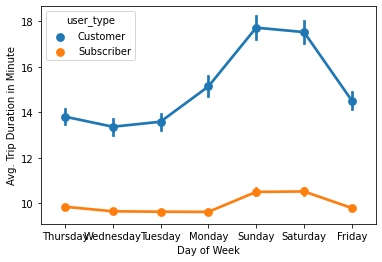

In [34]:
sb.pointplot(data=df_clean, x='start_day_of_week', y='duration_minute', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

> We can see that subscribers are taking much shorter rides compared to customers on workdays. Both Customers and subscribers have a noticeable increase in trip duration over the weekends, especially for customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>The point plot strengthened patterns discovered in the previous bivariate and univariate explorations. The short ride duration for subscribers on workdays during work hours showed a pattern that they tend to take bikes for work. The other pattern of customer use shows that they're taking advantage of the bike-sharing system quite different from the subscribers, longer times and more rides on weekends, for having fun rides around the city probably.
### Were there any interesting or surprising interactions between features?

> There are no surprising interactions. Most observations can be noticed from the beginning. Even the riding habits between males and females don't differ that much. 

In [35]:
#Storing the cleaned dataframe to a SCV file
df_clean.to_csv('clean_file.csv', index=False)

## Refrences
>https://realpython.com/how-to-use-numpy-arange/
>
>https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/
>
>https://seaborn.pydata.org/generated/seaborn.boxplot.html
>
>https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
>